In [1]:
import h5py
import pickle
import numpy as np
import matplotlib.pyplot as plt

files = {
    'nersc_file': '/mnt/data-slow/data/FCN_ERA5_data_v0/test/2017.h5',
    'cds_sl_file': '/mnt/data-slow/data/CDS_ERA5_2014_names_reverse_engineering/sl_2017.nc',
    'cds_pl_file': '/mnt/data-slow/data/CDS_ERA5_2014_names_reverse_engineering/pl_2017.nc'
}

def list_fileds(key, path):
    print(f"{key=}")
    try:
        with h5py.File(path, 'r') as h5_file:
            for name, value in h5_file.items():
                print("\t", name.ljust(15), value.shape)
    except OSError as e:
        print(f"Error opening file: {e}")

for key, path in files.items():
    list_fileds(key, path)

key='nersc_file'
	 fields          (1460, 21, 721, 1440)
key='cds_sl_file'
	 number          ()
	 valid_time      (2,)
	 latitude        (721,)
	 longitude       (1440,)
	 expver          (2,)
	 u10             (2, 721, 1440)
	 v10             (2, 721, 1440)
	 t2m             (2, 721, 1440)
	 msl             (2, 721, 1440)
	 sst             (2, 721, 1440)
	 sp              (2, 721, 1440)
	 tp              (2, 721, 1440)
	 z               (2, 721, 1440)
	 lsm             (2, 721, 1440)
	 tcw             (2, 721, 1440)
	 tcwv            (2, 721, 1440)
key='cds_pl_file'
	 number          ()
	 valid_time      (2,)
	 pressure_level  (4,)
	 latitude        (721,)
	 longitude       (1440,)
	 expver          (2,)
	 z               (2, 4, 721, 1440)
	 r               (2, 4, 721, 1440)
	 q               (2, 4, 721, 1440)
	 t               (2, 4, 721, 1440)
	 u               (2, 4, 721, 1440)
	 v               (2, 4, 721, 1440)


In [2]:
with h5py.File(files["cds_pl_file"], 'r') as h5_file:
    print(list(h5_file["pressure_level"]))

[1000.0, 850.0, 500.0, 50.0]


In [3]:
import json

with open("/mnt/data-slow/data/FCN_ERA5_data_v0/metadata.json", "r") as f:
    metadata = json.load(f)

channel_names = metadata["coords"]["channel"]

for i, channel_name in enumerate(channel_names):
    print(i, channel_name)

0 10u
1 10v
2 t2m
3 sp
4 msl
5 t_850
6 u_1000
7 v_1000
8 z_1000
9 u_850
10 v_850
11 z_850
12 u_500
13 v_500
14 z_500
15 t_500
16 z_50
17 r_500
18 r_850
19 tcwv
20 sst


In [4]:
cds_sl_fields = ["lsm", "msl", "sp", "sst", "t2m", "tcw", "tcwv", "tp", "u10", "v10", "z"]
cds_pl_fields = ["q", "r", "t", "u", "v", "z"]

with h5py.File(files["nersc_file"], 'r') as h5_nersc, h5py.File(files["cds_sl_file"], 'r') as cds_sl_nc, h5py.File(files["cds_pl_file"], 'r') as cds_pl_nc:
    # Select first 2 time steps in the NERSC dataset. They are supposed to be 6h apart and comprise 21 variables whose label is unknown
    nersc_data = np.array(h5_nersc["fields"][:2])
    print("NERSC data", nersc_data.shape)
    
    # From CDS I downloaded 8 time steps (and 4 pressure levels for the PL dataset)
    cds_sl = dict()
    for cds_sl_field in cds_sl_fields:
        cds_sl[cds_sl_field] = np.array(cds_sl_nc[cds_sl_field])
    
    cds_pl = dict()
    for cds_pl_field in cds_pl_fields:
        cds_pl[cds_pl_field] = np.array(cds_pl_nc[cds_pl_field])

print("CDS SL data", cds_sl[cds_sl_fields[0]].shape)
print("CDS PL data", cds_pl[cds_pl_fields[0]].shape)

NERSC data (2, 21, 721, 1440)
CDS SL data (2, 721, 1440)
CDS PL data (2, 4, 721, 1440)


In [20]:
import json

with open("/mnt/data-slow/data/FCN_ERA5_data_v0/metadata.json") as f:
    metadata = json.load(f)
    channels = metadata["coords"]["channel"]
    for idx, channel in enumerate(channels):
        print(f"{idx:2}: {channel}")

 0: 10u
 1: 10v
 2: t2m
 3: sp
 4: msl
 5: t_850
 6: u_1000
 7: v_1000
 8: z_1000
 9: u_850
10: v_850
11: z_850
12: u_500
13: v_500
14: z_500
15: t_500
16: z_50
17: r_500
18: r_850
19: tcwv
20: sst


Year 2015 file content shape: (1460, 21, 721, 1440)
Shape for the selected datapoint: (721, 1440)


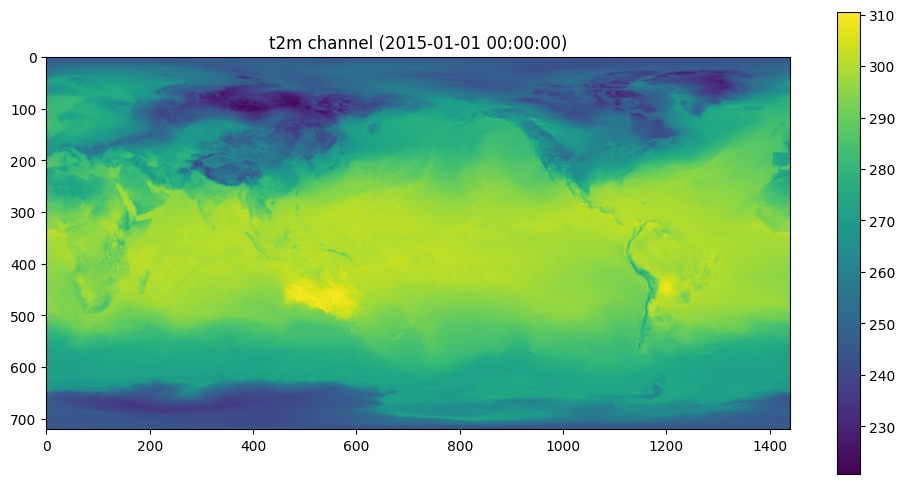

In [1]:
import h5py 
import matplotlib.pyplot as plt

with h5py.File("/mnt/data-slow/data/FCN_ERA5_data_v0/train/2015.h5", 'r') as f2015:
    d2015 = f2015["fields"]
    print("Year 2015 file content shape:", d2015.shape)

    # Index 0 signifies '2015-01-01 00:00:00'
    # Index 2 signifies 'temperature at 2m height'
    d2015_t0_t2m = d2015[0, 2, ...] 
    print("Shape for the selected datapoint:", d2015_t0_t2m.shape)

plt.figure(figsize=(12, 6))
plt.imshow(d2015_t0_t2m, cmap='viridis')
plt.colorbar()
plt.title("t2m channel (2015-01-01 00:00:00)")
plt.show()

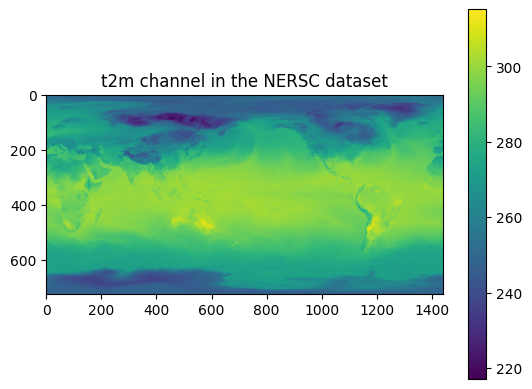

In [6]:
import matplotlib.pyplot as plt

nersc_channel_t2m = nersc_data[0][2]

plt.imshow(nersc_channel_t2m, cmap='viridis')
plt.colorbar()
plt.title("t2m channel in the NERSC dataset")
plt.show()

In [30]:

def lookup(nersc_data, cds_sl, cds_pl):
    rtol = 1e-02
    atol = 1e-02

    results = dict()

    # For each channel in the NERSC dataset, look for an equivalent within the SL channels downloaded from CDS
    for nersc_t in range(nersc_data.shape[0]):
        for nersc_var_i in [8, 20]: # range(nersc_data[nersc_t].shape[0]):
            nersc_window = nersc_data[nersc_t, nersc_var_i]

            print(f"{nersc_t=} {nersc_var_i=}")
            results_key = (nersc_t, nersc_var_i)
            results[results_key] = list()

            # Look for this unlabeled variable within the SL channels
            for cds_sl_field in cds_sl_fields:
                for cds_t in range(cds_sl[cds_sl_field].shape[0]):
                    cds_window = cds_sl[cds_sl_field][cds_t]

                    if cds_sl_field == "sst":
                        cds_window[np.isnan(cds_window)] = -32767.0

                    nersc_min = np.min(nersc_window)
                    nersc_max = np.max(nersc_window)
                    nersc_range = np.abs(nersc_max - nersc_min)
                    cds_min = np.min(cds_window)
                    cds_max = np.max(cds_window)
                    cds_range = np.abs(cds_max - cds_min)
                    ratio = nersc_range/cds_range

                    #print(f"\t{cds_sl_field=} {cds_t=}")
                    if ratio < .8 or ratio > 1.2:
                        pass # continue

                    if np.allclose(nersc_window, cds_window, rtol=rtol, atol=atol):
                        print("\t\t ADDING RESULT !!!!!!!!!!!!!!!!!!!!!!!")
                        results[results_key].append({
                            "cds_sl_field": cds_sl_field,
                            "cds_t": cds_t,
                            "closeness": np.max(np.abs(nersc_window - cds_window)),
                            "NERSC min": nersc_min,
                            "NERSC max": nersc_max,
                            "CDS min": cds_min,
                            "CDS max": cds_max
                        })

            # Look for this unlabeled variable within the PL channels
            for cds_pl_field in cds_pl_fields:
                for cds_t in range(cds_pl[cds_pl_field].shape[0]):
                    for pl in range(cds_pl[cds_pl_field][cds_t].shape[0]):
                        cds_window = cds_pl[cds_pl_field][cds_t, pl]

                        nersc_min = np.min(nersc_window)
                        nersc_max = np.max(nersc_window)
                        nersc_range = np.abs(nersc_max - nersc_min)
                        cds_min = np.min(cds_window)
                        cds_max = np.max(cds_window)
                        cds_range = np.abs(cds_max - cds_min)
                        ratio = nersc_range/cds_range

                        #print(f"\t{cds_pl_field=} {cds_t=} {pl=}")
                        if ratio < .8 or ratio > 1.2:
                            pass #continue

                        if np.allclose(nersc_window, cds_window, rtol=rtol, atol=atol):
                            print("\t\t ADDING RESULT !!!!!!!!!!!!!!!!!!!!!!!")
                            results[results_key].append({
                                "cds_pl_field": cds_pl_field,
                                "cds_t": cds_t,
                                "pl": pl,
                                "closeness": np.max(np.abs(nersc_window - cds_window)),
                                "NERSC min": nersc_min,
                                "NERSC max": nersc_max,
                                "CDS min": cds_min,
                                "CDS max": cds_max
                            })
    return results

results = lookup(nersc_data, cds_sl, cds_pl)

nersc_t=0 nersc_var_i=8
nersc_t=0 nersc_var_i=20
		 ADDING RESULT !!!!!!!!!!!!!!!!!!!!!!!
nersc_t=1 nersc_var_i=8
nersc_t=1 nersc_var_i=20
		 ADDING RESULT !!!!!!!!!!!!!!!!!!!!!!!


In [31]:
for key, values in results.items():
    nersc_t, nersc_var_i = key
    print(f"{nersc_t=}, {nersc_var_i=}")
    if len(values):
        for value in values:
            print(f"\t{value}")
    else:
        print("\tNo results")

nersc_t=0, nersc_var_i=8
	No results
nersc_t=0, nersc_var_i=20
	{'cds_sl_field': 'sst', 'cds_t': 0, 'closeness': 0.00033569336, 'NERSC min': -32767.0, 'NERSC max': 306.82092, 'CDS min': -32767.0, 'CDS max': 306.8208}
nersc_t=1, nersc_var_i=8
	No results
nersc_t=1, nersc_var_i=20
	{'cds_sl_field': 'sst', 'cds_t': 0, 'closeness': 0.8360901, 'NERSC min': -32767.0, 'NERSC max': 306.3794, 'CDS min': -32767.0, 'CDS max': 306.8208}


In [21]:
with h5py.File(files["cds_pl_file"], 'r') as h5_file:
    pl_map = dict()
    for i, pl in enumerate(h5_file["pressure_level"]):
        pl_map[i] = int(pl)

for key, values in results.items():
    _, nersc_var_i = key
    expected_key = channel_names[nersc_var_i]
    if expected_key == "__?__":
        continue
    if "_" in expected_key:
        channel_name, pl = expected_key.split("_")
    else:
        channel_name = expected_key
        pl = None

    for value in values:
        if pl is None:
            assert value["cds_sl_field"] == channel_name, f"{value['cds_sl_field']} != {channel_name}"
        else:
            assert value["cds_pl_field"] == channel_name, f"{value['cds_pl_field']} != {channel_name}"
            assert pl_map[value["pl"]] == int(pl), f"{pl_map[value['pl']]} != {pl}"

print("Tests passed! :)")

Tests passed! :)


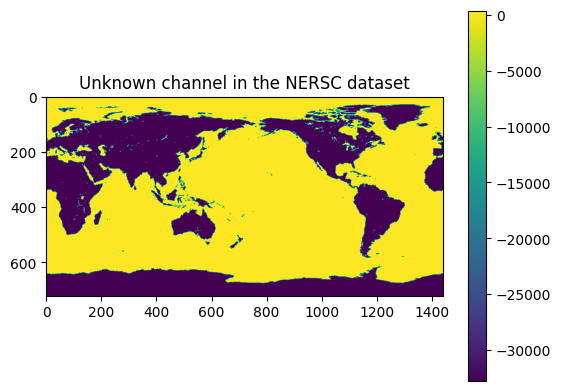

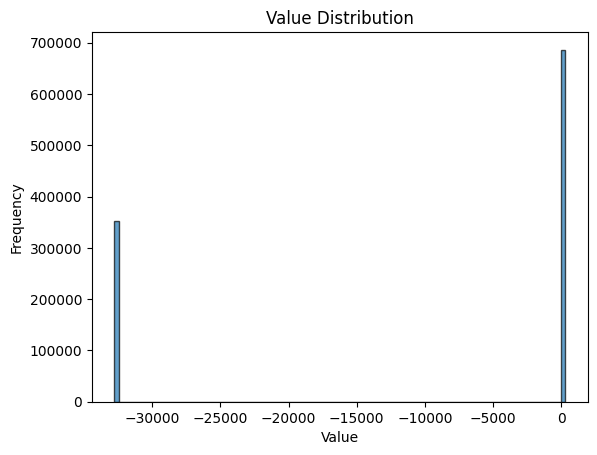

33923


In [118]:
import matplotlib.pyplot as plt

nersc_channel_20 = nersc_data[0][20]

plt.imshow(nersc_channel_20, cmap='viridis')
plt.colorbar()
plt.title("Unknown channel in the NERSC dataset")
plt.show()

plt.hist(nersc_channel_20.flatten(), bins=100, edgecolor='k', alpha=0.7)
plt.title("Value Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plt.yscale('log')
plt.show()

print(len(np.unique(nersc_channel_20)))

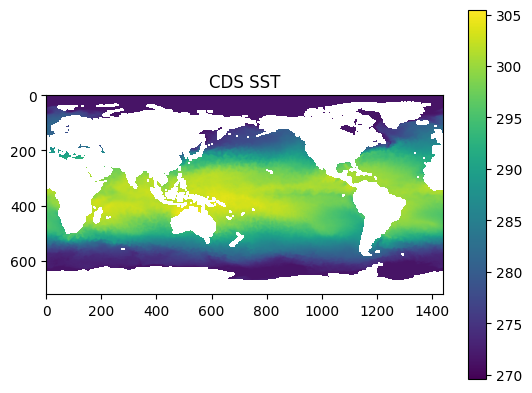

In [110]:
cds_sst = cds_sl["sst"][0]

plt.imshow(cds_sst, cmap='viridis')
plt.colorbar()
plt.title("CDS SST")
plt.show()

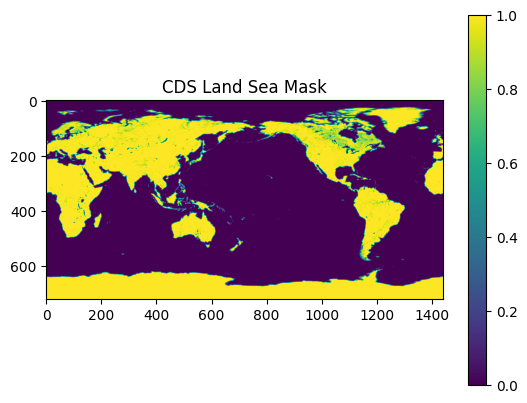

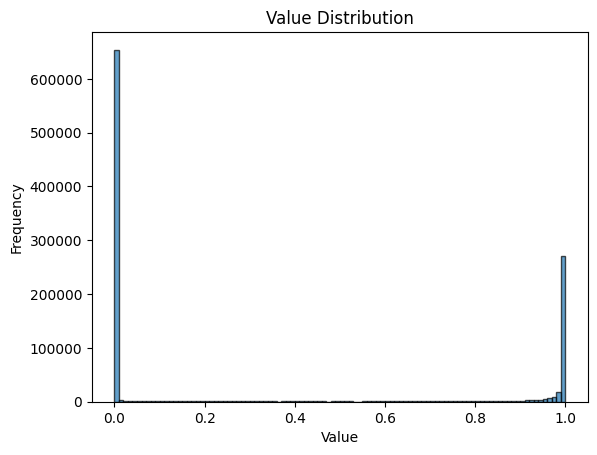

161239


In [119]:
cds_lsm = cds_sl["lsm"][0]

plt.imshow(cds_lsm, cmap='viridis')
plt.colorbar()
plt.title("CDS Land Sea Mask")
plt.show()

plt.hist(cds_lsm.flatten(), bins=100, edgecolor='k', alpha=0.7)
plt.title("Value Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plt.yscale('log')
plt.show()

print(len(np.unique(cds_lsm)))


In [ ]:
import h5py
import numpy as np

files = [
    "/mnt/data-slow/data/FCN_ERA5_data_v0/test/2017.h5",
    "/mnt/data-slow/data/FCN_ERA5_data_v0/train/2014.h5",
    "/mnt/data-slow/data/FCN_ERA5_data_v0/train/2015.h5"
]

for f in files:
    with h5py.File(f, 'r') as h5_nersc:
        min_vals = np.min(h5_nersc["fields"][:, 20, :, :], axis=(1, 2))
        print(min_vals.shape, min_vals)
        print(np.unique(min_vals))


(1460,) [-32767. -32767. -32767. ... -32767. -32767. -32767.]
[-32767.]
(1460,) [-32767. -32767. -32767. ... -32767. -32767. -32767.]
[-32767.]
(1460,) [-32767. -32767. -32767. ... -32767. -32767. -32767.]
[-32767.]


In [8]:
list(np.unique(min_vals))

[-32767.0]

In [113]:
min_vals = np.min(nersc_sst_data, axis=(1, 2))
min_vals

array([-32767., -32767., -32767., ..., -32767., -32767., -32767.],
      dtype=float32)

In [10]:
np.unique(min_vals)[0]

-32767.0

In [99]:
with h5py.File(cds_sl_all_fields, 'r') as cds:
    cds_data_lsm = np.array(cds["lsm"][0])
    cds_data_sst = np.array(cds["sst"][0])

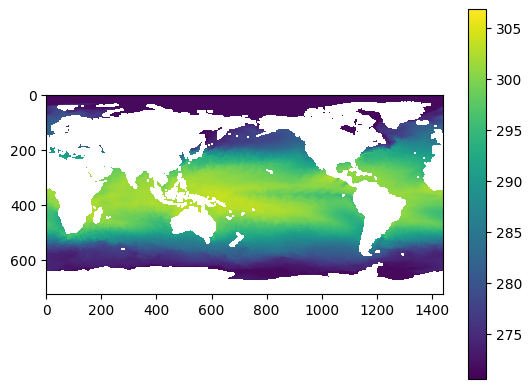

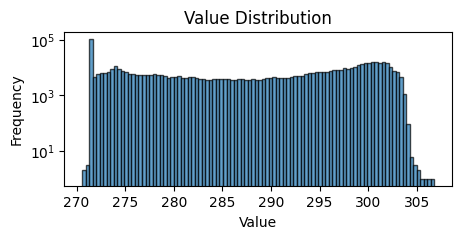

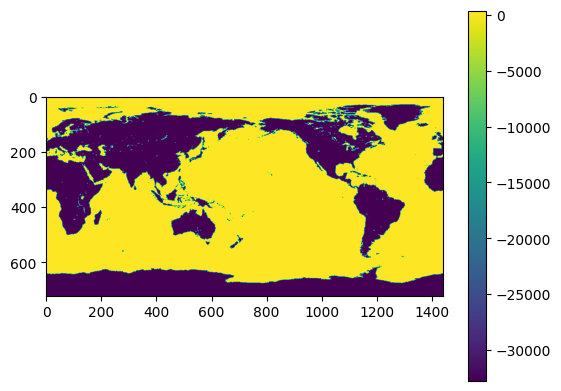

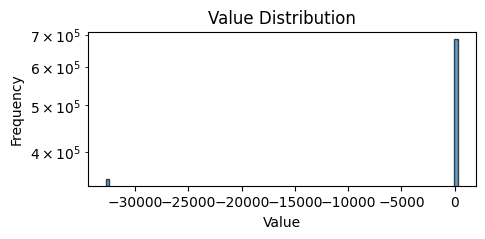

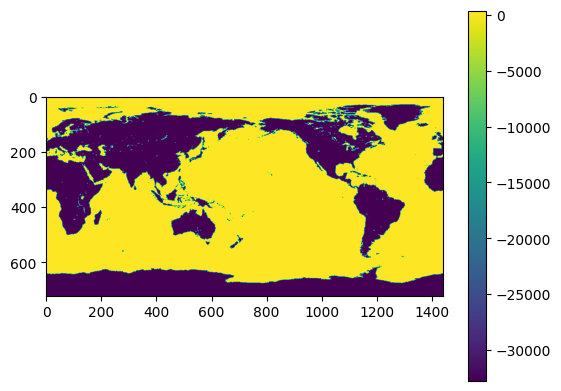

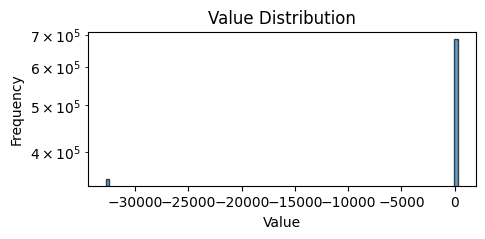

In [101]:
plt.imshow(cds_data_sst, cmap='viridis')
plt.colorbar()
plt.show()

plt.figure(figsize=(5, 2))
plt.hist(cds_data_sst.flatten(), bins=100, edgecolor='k', alpha=0.7)
plt.title("Value Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.yscale('log')
plt.show()


plt.imshow(nersc_data, cmap='viridis')
plt.colorbar()
plt.show()

plt.figure(figsize=(5, 2))
plt.hist(nersc_data.flatten(), bins=100, edgecolor='k', alpha=0.7)
plt.title("Value Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.yscale('log')
plt.show()


cds_data_sst_corrected = np.array(cds_data_sst)
cds_data_sst_corrected[np.isnan(cds_data_sst_corrected)] = -32767.

plt.imshow(cds_data_sst_corrected, cmap='viridis')
plt.colorbar()
plt.show()

plt.figure(figsize=(5, 2))
plt.hist(cds_data_sst_corrected.flatten(), bins=100, edgecolor='k', alpha=0.7)
plt.title("Value Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.yscale('log')
plt.show()

In [105]:
np.allclose(cds_data_sst_corrected, nersc_data, rtol=0.0001, atol=0.0001)

True